In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#reading the dataset
missing=['Na','NAN','na','NA','n/a','N/A','NULL','null']
import requests
from io import StringIO

orig_url='https://drive.google.com/file/d/1JmonsbKBz_cRp25vawEHFDLwlPN2sp9b/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
housing_df=pd.read_csv(csv_raw,na_values=missing)
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#basic understanding of the data
housing_df.shape

(1460, 81)

In [5]:
housing_df.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [143]:
#finding the dtypes of the variables
temp_df=housing_df.dtypes
temp_df.to_csv('temp.csv')

In [144]:
#checking the dtypes, we can covert MSSubClass to object 
housing_df['MSSubClass']=housing_df['MSSubClass'].astype('object')

In [145]:
housing_df['YrSold'].describe()

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

In [146]:
#The below variables are date time variables in our data 
housing_df[['YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt']].describe()

,YearBuilt,YearRemodAdd,MoSold,YrSold,GarageYrBlt
count,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000
mean,1971.267808,1984.865753,6.321918,2007.815753,1978.506164
std,30.202904,20.645407,2.703626,1.328095,24.689725
min,1872.000000,1950.000000,1.000000,2006.000000,1900.000000
25%,1954.000000,1967.000000,5.000000,2007.000000,1961.000000
50%,1973.000000,1994.000000,6.000000,2008.000000,1980.000000
75%,2000.000000,2004.000000,8.000000,2009.000000,2002.000000
max,2010.000000,2010.000000,12.000000,2010.000000,2010.000000


In [147]:
housing_df[['YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt']]

,YearBuilt,YearRemodAdd,MoSold,YrSold,GarageYrBlt
0,2003,2003,2,2008,2003.0
1,1976,1976,5,2007,1976.0
2,2001,2002,9,2008,2001.0
3,1915,1970,2,2006,1998.0
4,2000,2000,12,2008,2000.0
5,1993,1995,10,2009,1993.0
6,2004,2005,8,2007,2004.0
7,1973,1973,11,2009,1973.0
8,1931,1950,4,2008,1931.0
9,1939,1950,1,2008,1939.0


__It is evident that the last transaction of built or sold has happened in 2010__

In [148]:
#From the data we can extract a new variable called "Age" of the house
housing_df['Age']=housing_df['YrSold']-housing_df['YearBuilt']

In [149]:
#GarageAge - Age of the Garage
housing_df['GarageAge']=housing_df['YrSold']-housing_df['GarageYrBlt']

In [150]:
#Years since last renovation which is Age - (YearRemodAdd - YearBuilt)
housing_df['Yrlastrenov']=housing_df['Age']-(housing_df['YearRemodAdd']-housing_df['YearBuilt'])

__We can dervive the quarter in a year when the house was sold.__



In [151]:
housing_df['QuarSold']=0
housing_df.loc[housing_df['MoSold'] == 1,'QuarSold']='Q1'
housing_df.loc[housing_df['MoSold'] == 2,'QuarSold']='Q1'
housing_df.loc[housing_df['MoSold'] == 3,'QuarSold']='Q1'

housing_df.loc[housing_df['MoSold'] == 4,'QuarSold']='Q2'
housing_df.loc[housing_df['MoSold'] == 5,'QuarSold']='Q2'
housing_df.loc[housing_df['MoSold'] == 6,'QuarSold']='Q2'

housing_df.loc[housing_df['MoSold'] == 7,'QuarSold']='Q3'
housing_df.loc[housing_df['MoSold'] == 8,'QuarSold']='Q3'
housing_df.loc[housing_df['MoSold'] == 9,'QuarSold']='Q3'

housing_df.loc[housing_df['MoSold'] == 10,'QuarSold']='Q4'
housing_df.loc[housing_df['MoSold'] == 11,'QuarSold']='Q4'
housing_df.loc[housing_df['MoSold'] == 12,'QuarSold']='Q4'

In [152]:
#deleting the datetime columns not needed anymore
housing_df.drop(['YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt'],1,inplace=True)

## EDA

__Univariate Categorical__

In [153]:
def univariate_cat(df):
    dtype_cat=['category','object']
    col_names=df.select_dtypes(include=dtype_cat).columns
    for columns in col_names:
        sns.set(style="whitegrid")
        fig = plt.figure(figsize=(8, 3))
        ax = df[columns].value_counts().plot(kind='barh')
        for i, v in enumerate(df[columns].value_counts()):
            ax.text(v, i, " "+str(round((v/df.shape[0])*100))+'%', color='grey', verticalalignment='center',fontweight='bold')
        plt.title("Distribution of {}".format(columns), fontsize=16)
        ax.yaxis.grid(False)
   
        plt.show()

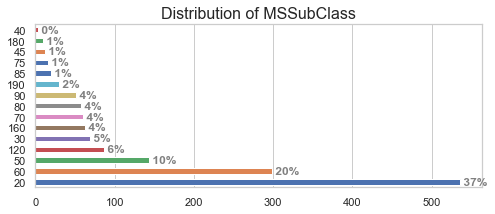

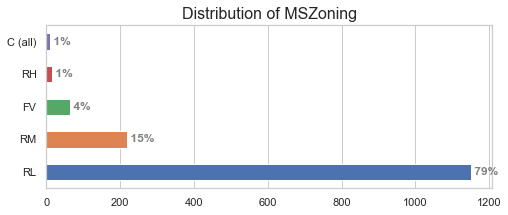

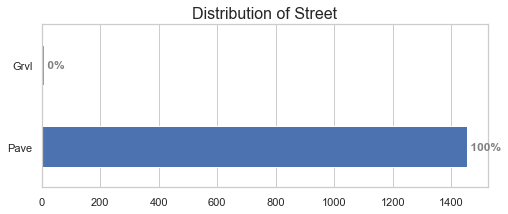

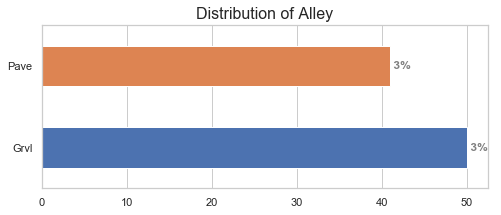

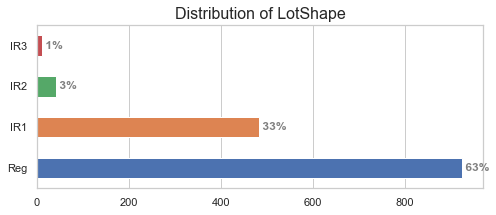

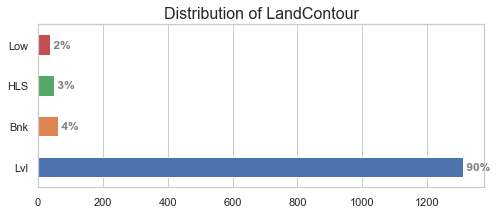

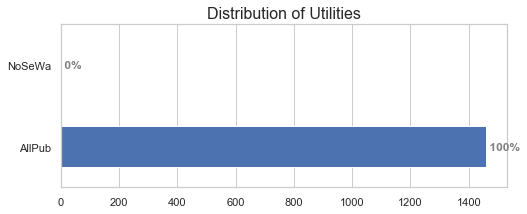

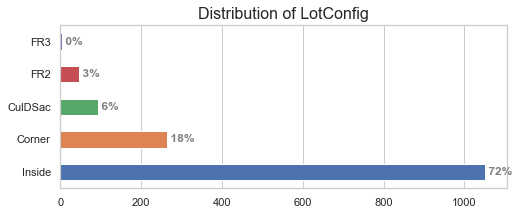

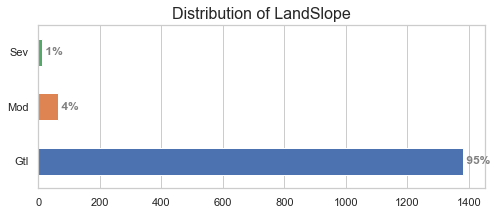

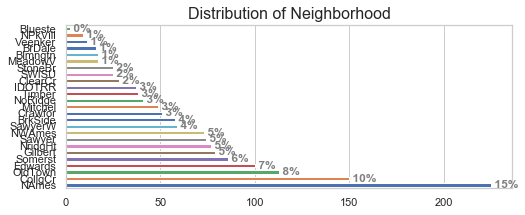

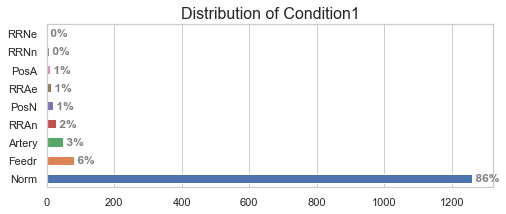

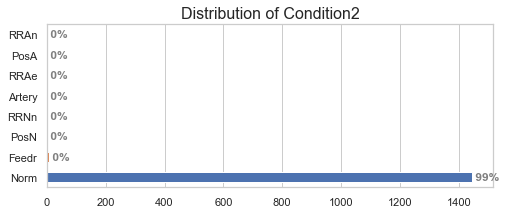

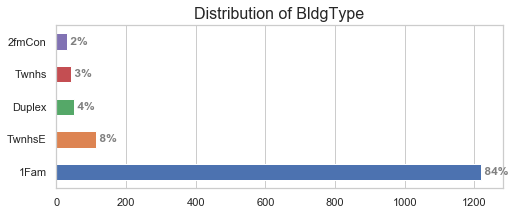

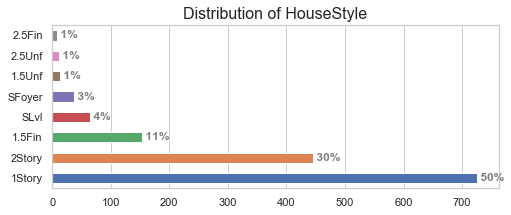

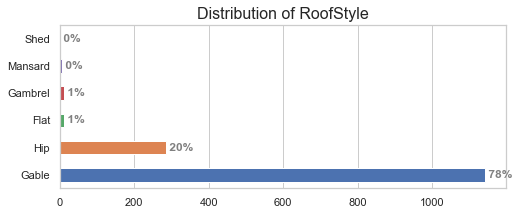

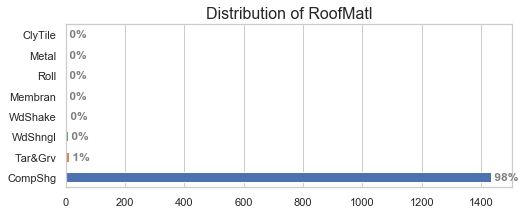

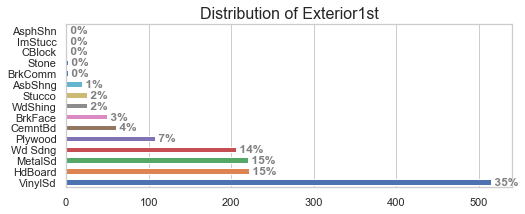

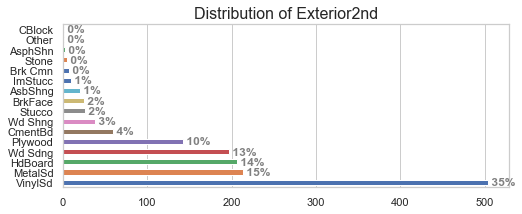

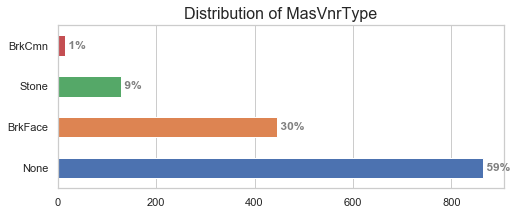

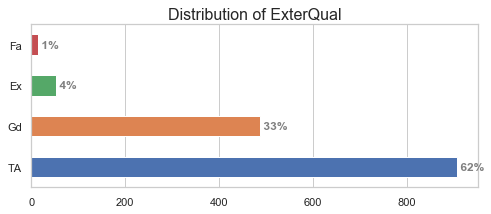

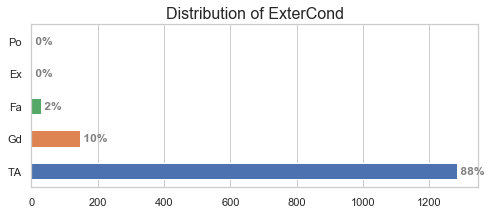

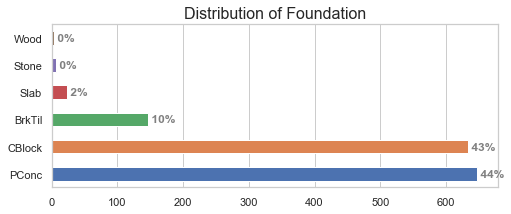

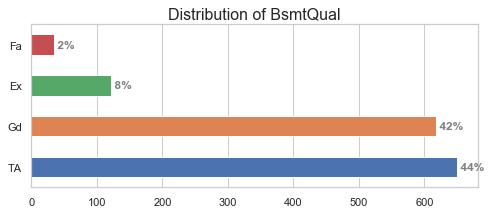

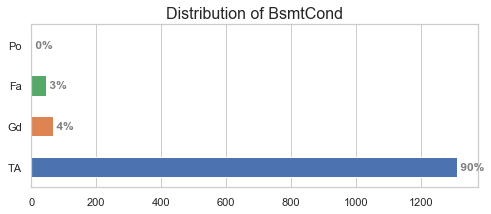

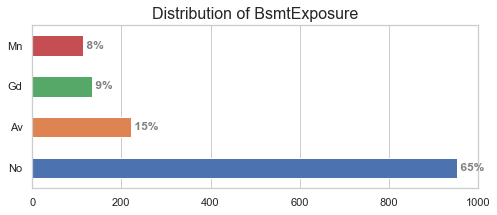

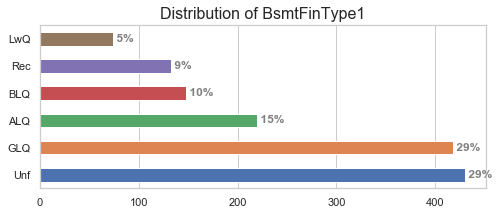

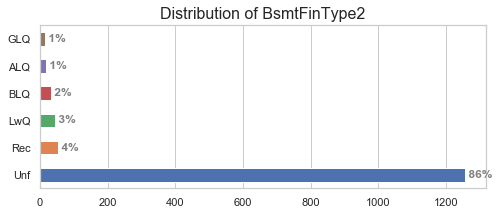

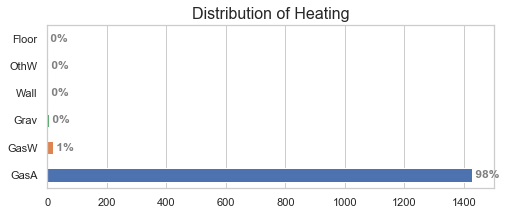

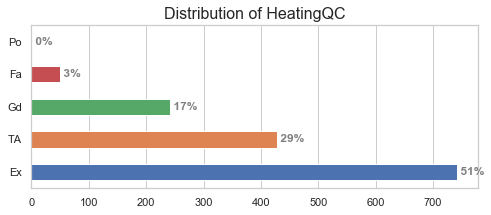

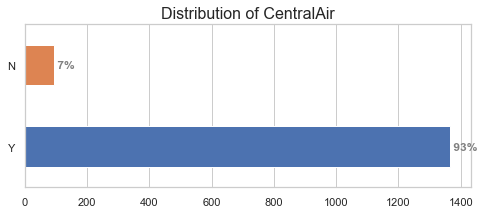

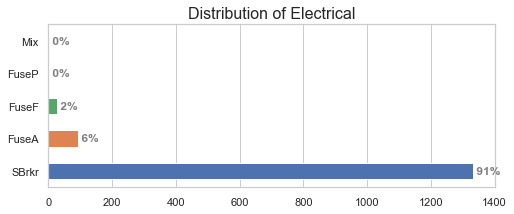

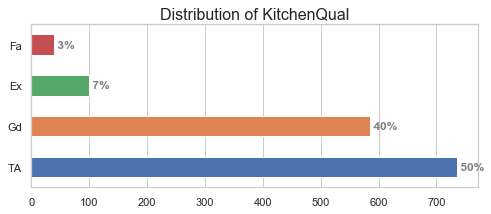

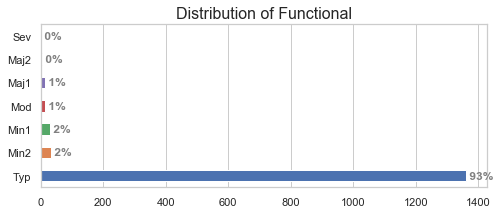

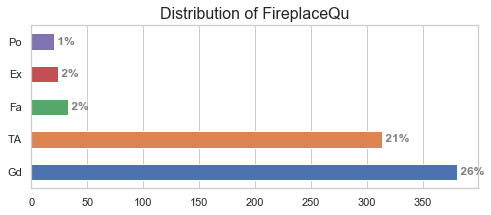

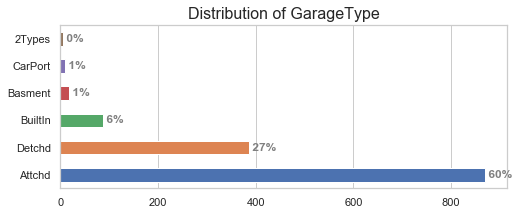

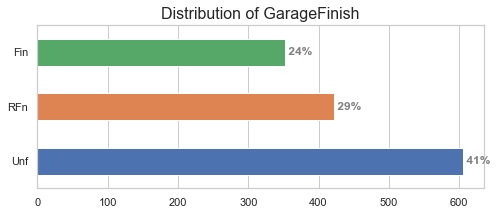

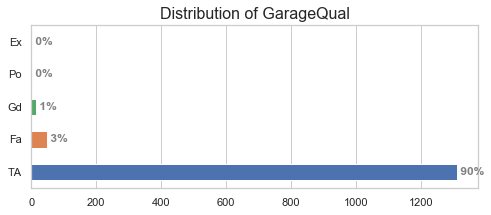

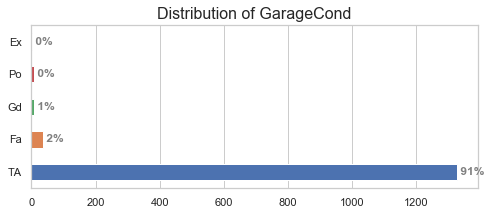

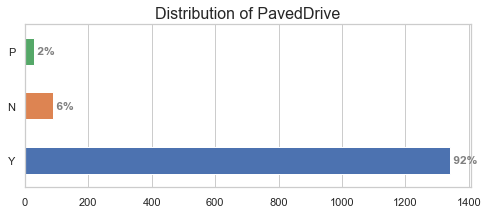

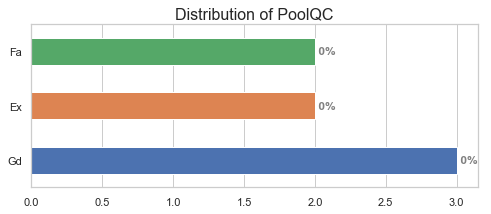

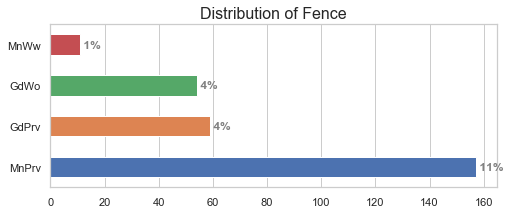

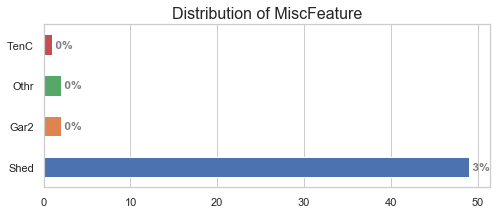

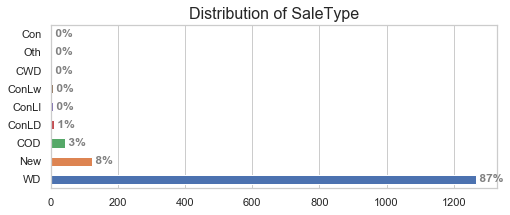

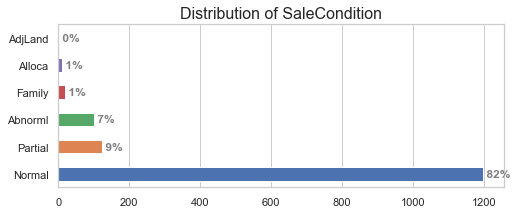

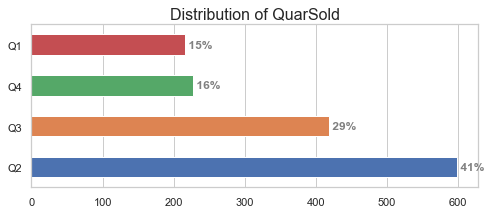

In [154]:
univariate_cat(housing_df)

__Based on the univariate analysis we found that the below columns can be dropped because they have low variance__
1. Street
2. LandCountour
3. Utilities
4. LandSlope
5. Condition1
6. Condition2
7. BldgType
8. RoofMatl
9. ExterCond
10. BsmtCond
11. BsmtFinType2
12. Heating
13. CentralAir
14. Electrical
15. Functional
16. GarageQual
17. GarageCond
18. PavedDrive
19. SaleType
20. SaleCondtion


In [155]:
#dropping columns which were identified in univariate analysis above as not usefulto our model

uni_drop_col=["Street","LandContour","Utilities","LandSlope","Condition1","Condition2","BldgType","RoofMatl","ExterCond","BsmtCond","BsmtFinType2","Heating","CentralAir","Electrical","Functional","GarageQual","GarageCond","PavedDrive","SaleType","SaleCondition"]
housing_df.drop(uni_drop_col,1,inplace=True)

In [156]:
def univariate_num(df):
    from scipy.stats import norm
    dtype_num=['float64','int32','int64']
    col_names=df.select_dtypes(include=dtype_num).columns
    for columns in col_names:
        sns.set(style="whitegrid")
        plt.figure(figsize=(11,4))
        plt.subplot(121)
        plt.title(f'Distplot of {columns}')
        sns.distplot(df[columns].dropna(),fit=norm,kde=False)

        plt.subplot(122)
        plt.title(f'Boxplot  of {columns}')
        sns.boxplot(y=df[columns].dropna())
        plt.show()

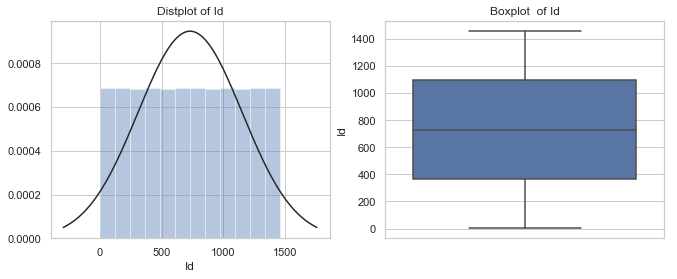

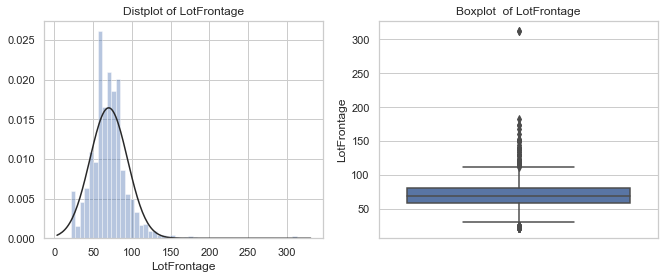

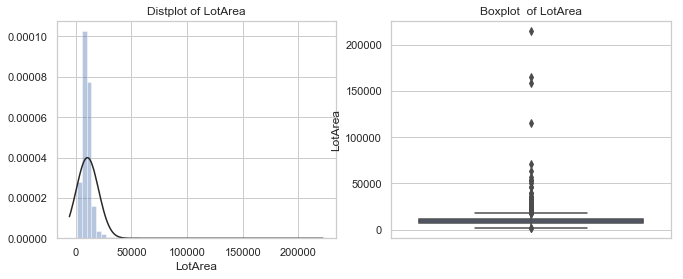

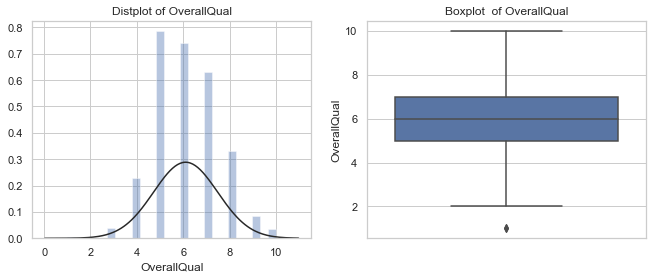

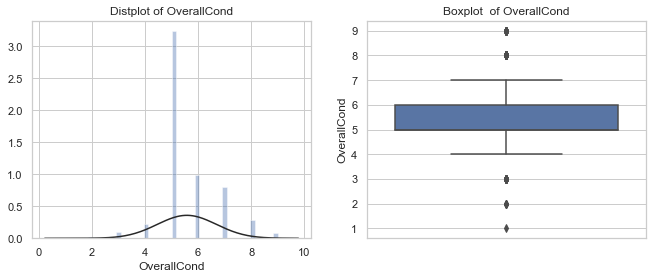

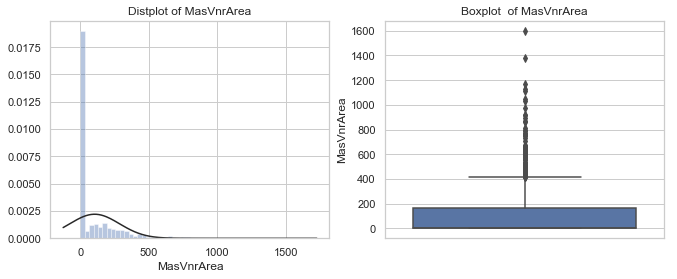

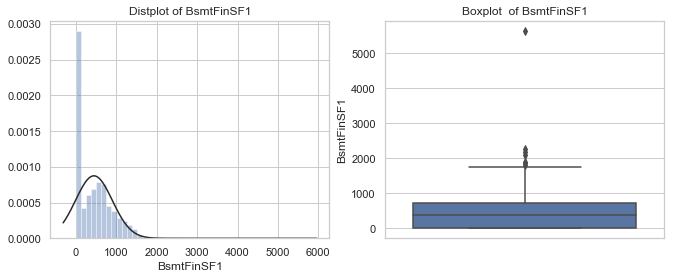

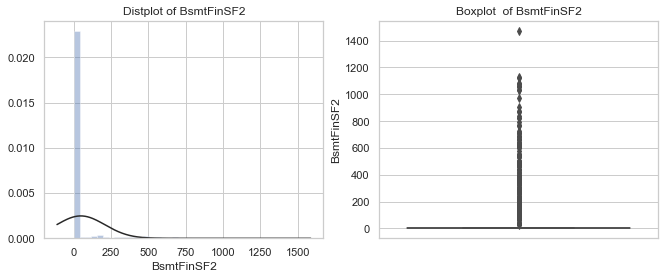

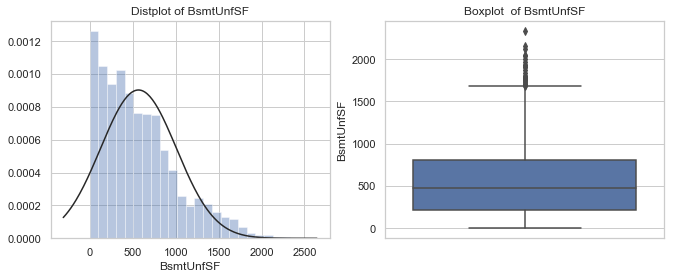

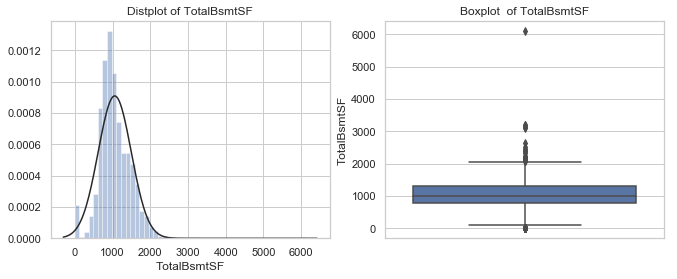

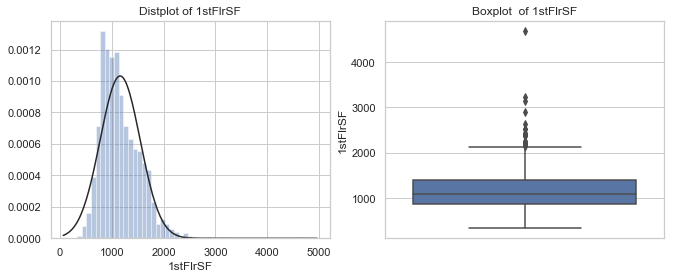

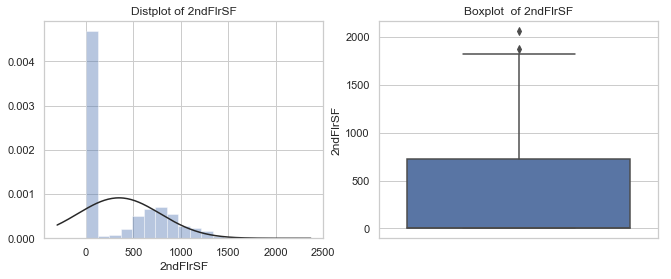

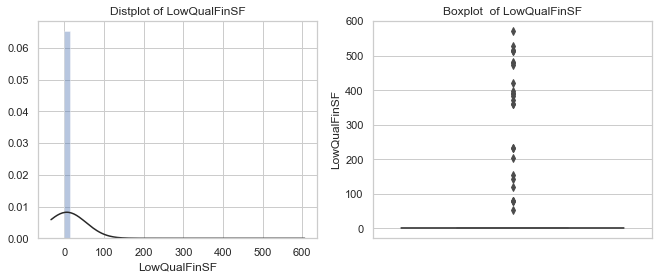

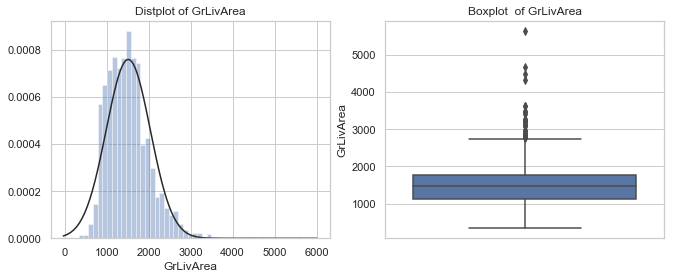

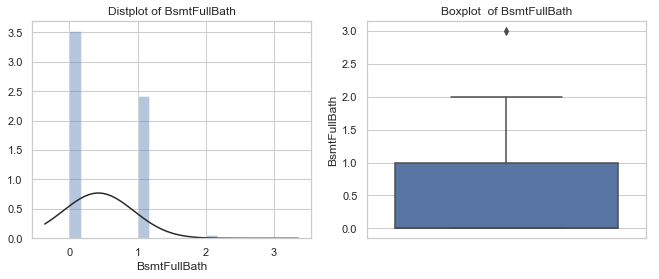

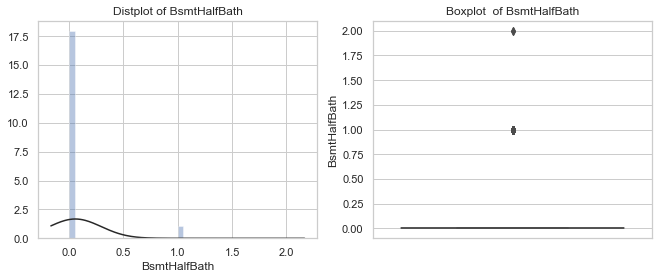

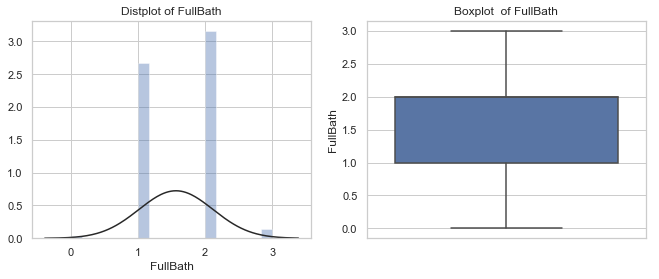

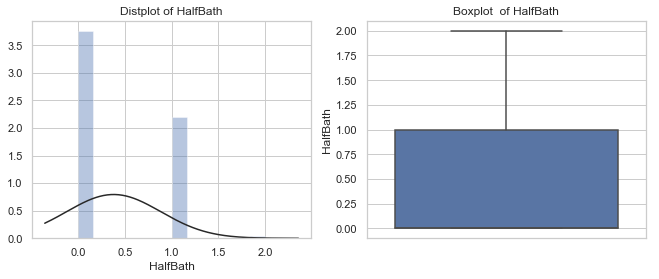

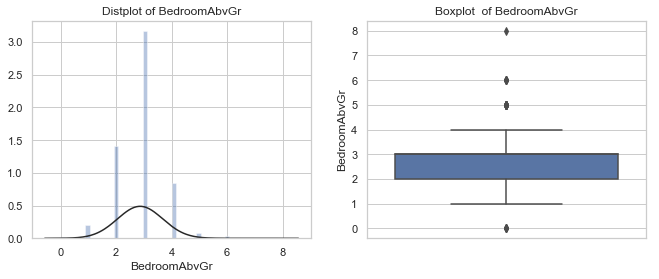

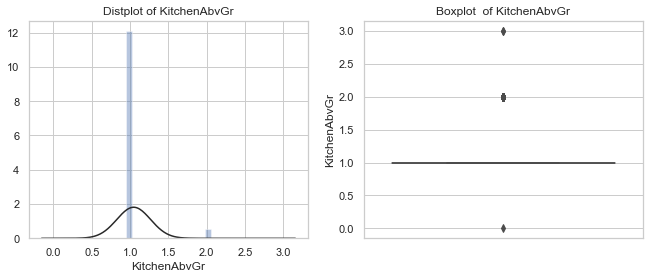

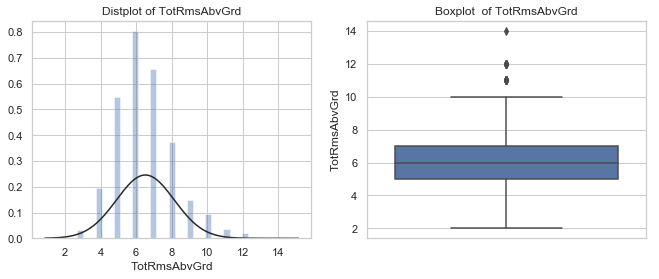

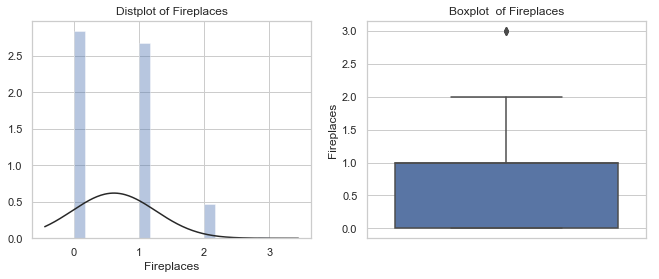

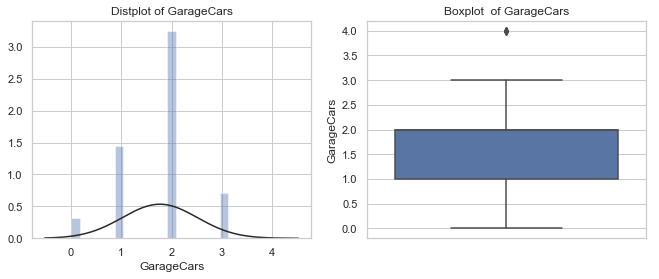

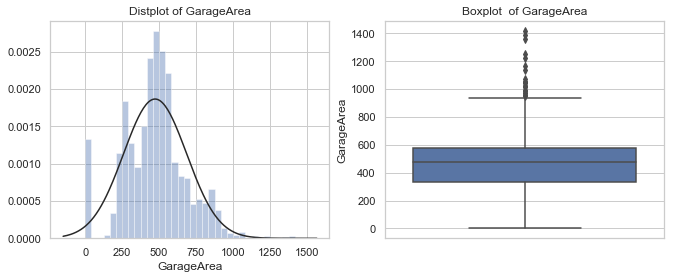

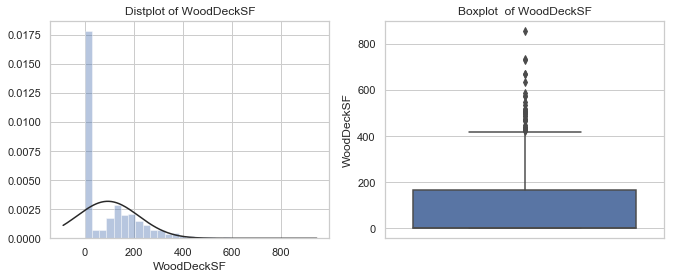

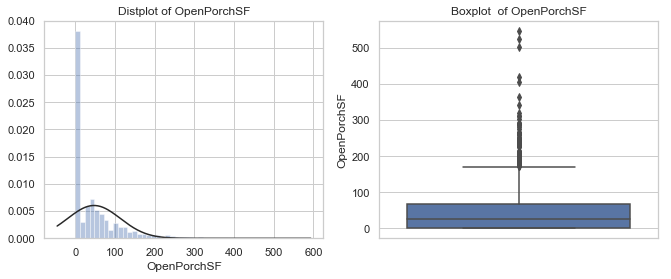

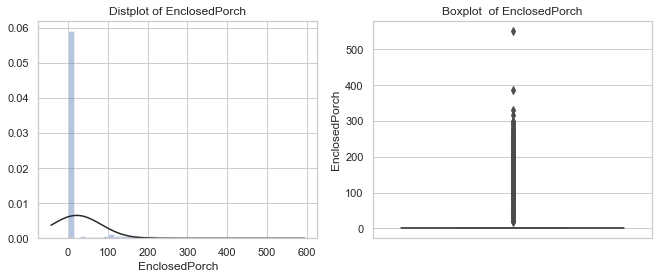

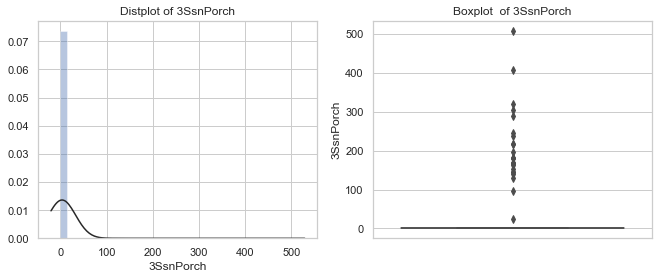

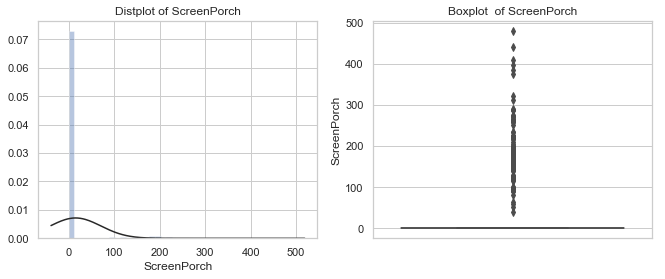

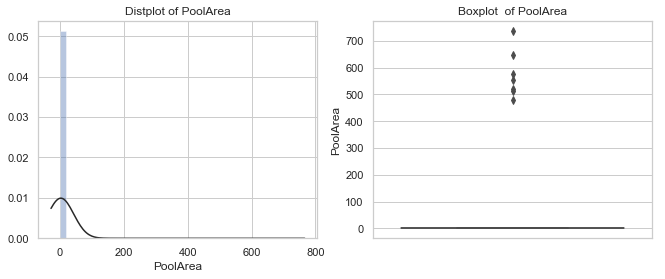

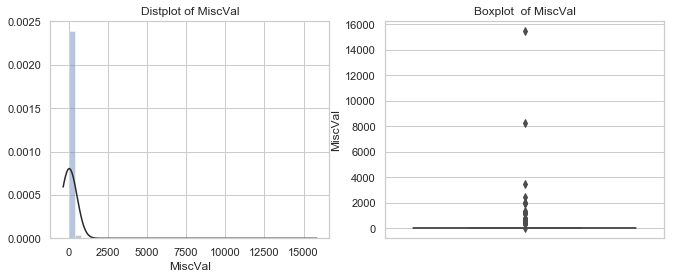

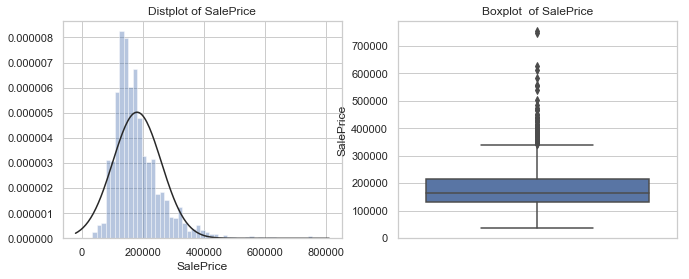

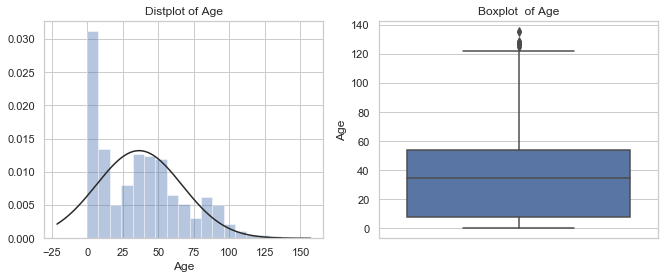

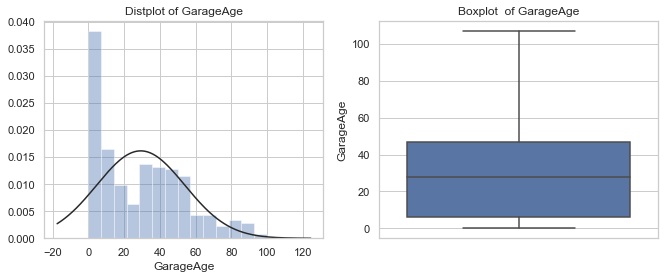

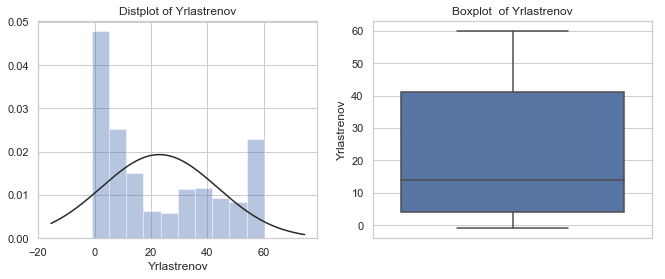

In [157]:
univariate_num(housing_df)

__Univariate Numerical observation__
__The below variables has outliers__
1. LotArea 
2. BsmyFInSF2 
3. LowQualFinSF 
4. BsmtHalfBath 
5. KitchenAbvGr
6. WoodDeckSf
7. OpenPorchSf
8. EnclosedPorch
9. 3SsnPorch
10. ScreenPorch
11. PoolArea
12. MiscVal
13. BsmyFInSF1


In [158]:
def segmented_univariate_num_target(df,TARGET_var):
    category=['category','object']
    cat_columns=df.select_dtypes(include=category).columns
    for i in cat_columns:
        sns.set(style="whitegrid")
        fig = plt.figure(figsize=(6, 4))
        print(" The comparision of Avegrages of {} vs Target".format(i))
        sns.barplot(x=TARGET_var,y=i,data=df,orient='h',estimator=np.mean)
        plt.show()
        

 The comparision of Avegrages of MSSubClass vs Target


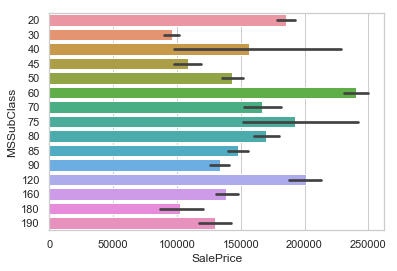

 The comparision of Avegrages of MSZoning vs Target


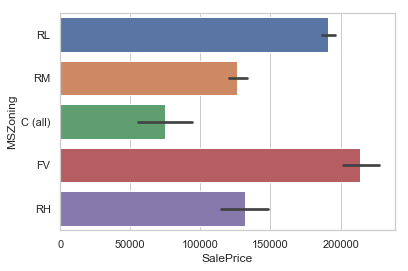

 The comparision of Avegrages of Alley vs Target


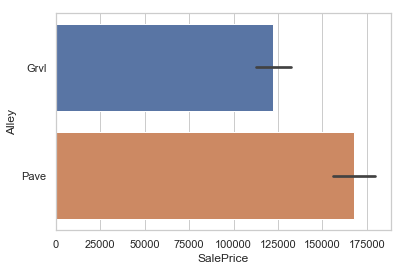

 The comparision of Avegrages of LotShape vs Target


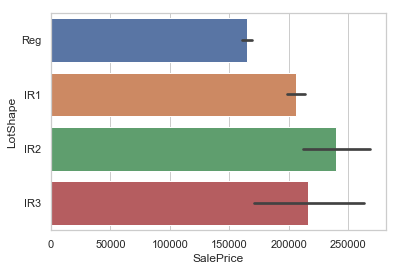

 The comparision of Avegrages of LotConfig vs Target


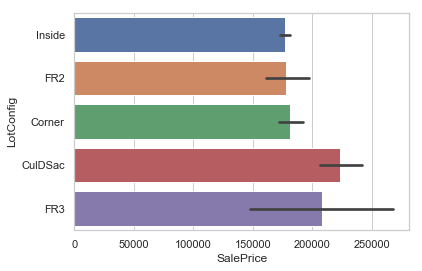

 The comparision of Avegrages of Neighborhood vs Target


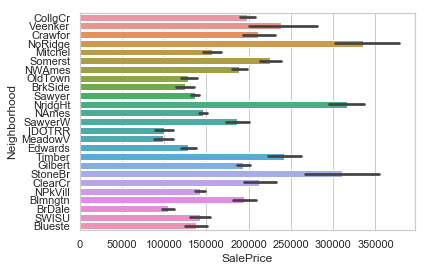

 The comparision of Avegrages of HouseStyle vs Target


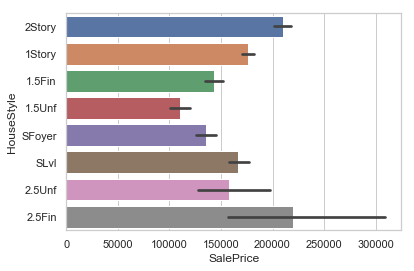

 The comparision of Avegrages of RoofStyle vs Target


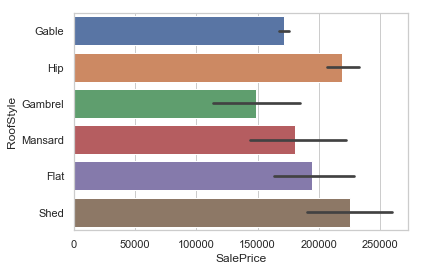

 The comparision of Avegrages of Exterior1st vs Target


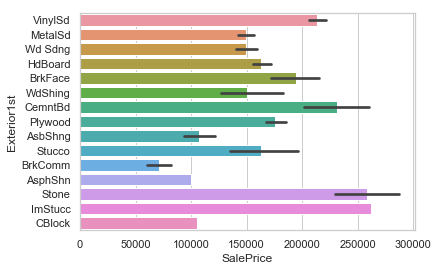

 The comparision of Avegrages of Exterior2nd vs Target


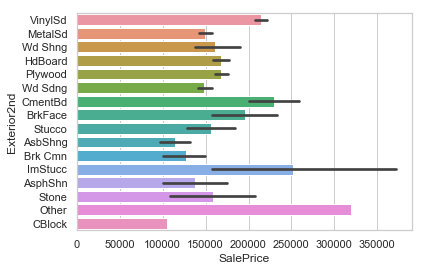

 The comparision of Avegrages of MasVnrType vs Target


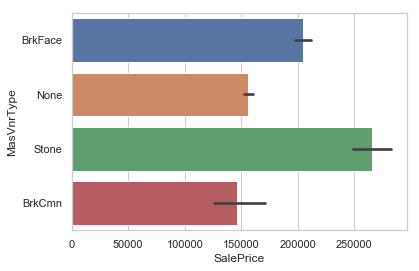

 The comparision of Avegrages of ExterQual vs Target


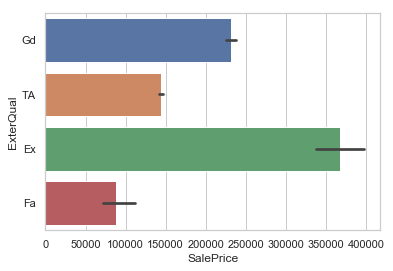

 The comparision of Avegrages of Foundation vs Target


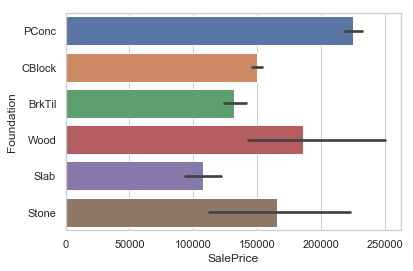

 The comparision of Avegrages of BsmtQual vs Target


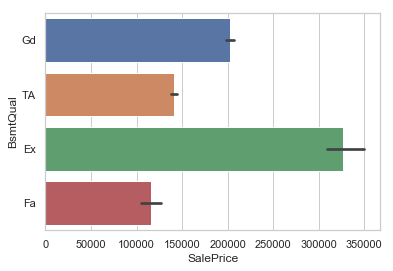

 The comparision of Avegrages of BsmtExposure vs Target


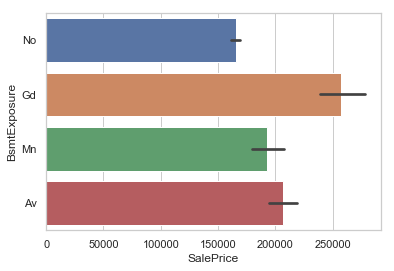

 The comparision of Avegrages of BsmtFinType1 vs Target


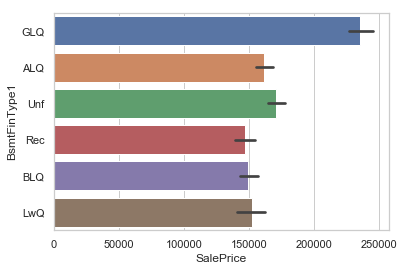

 The comparision of Avegrages of HeatingQC vs Target


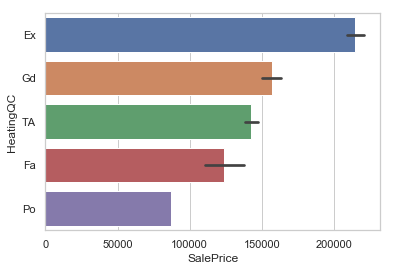

 The comparision of Avegrages of KitchenQual vs Target


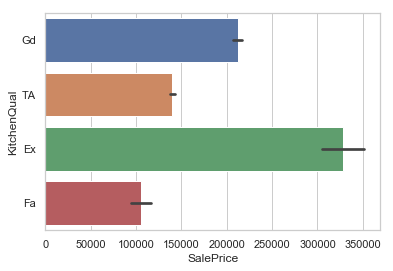

 The comparision of Avegrages of FireplaceQu vs Target


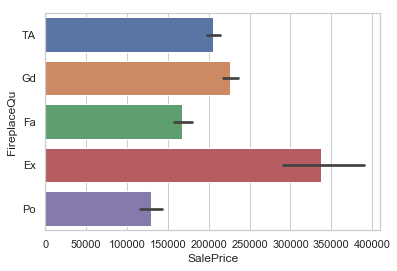

 The comparision of Avegrages of GarageType vs Target


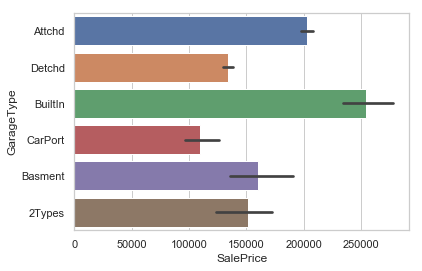

 The comparision of Avegrages of GarageFinish vs Target


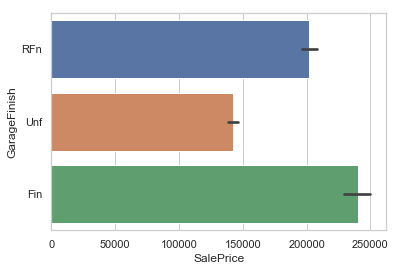

 The comparision of Avegrages of PoolQC vs Target


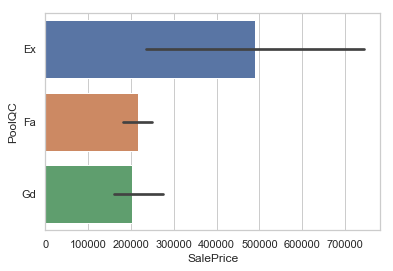

 The comparision of Avegrages of Fence vs Target


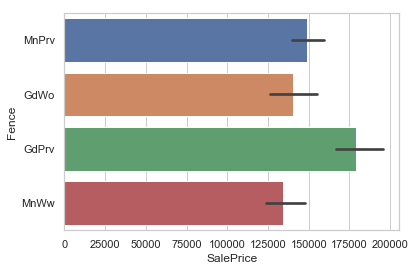

 The comparision of Avegrages of MiscFeature vs Target


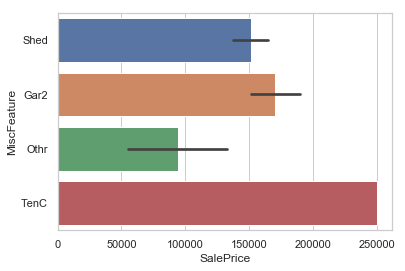

 The comparision of Avegrages of QuarSold vs Target


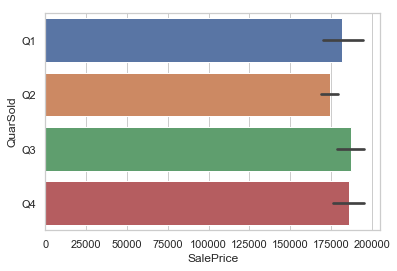

In [159]:
segmented_univariate_num_target(housing_df,'SalePrice')

__Segmented Univarite Analysis__
__some prominent observations__

1. Floating Village Residential type of MSZoning has high salesprice
2. "Two and one-half story: 2nd level finished" Housestyle has high salesprice
3. "Imitation Stucco" Exterior has high sales price
4. "Stone" Masonary Vaneer type has high salesprice.
5. "Poured Contrete" foundation houses have better salesprice.
6. "Buildin" Garage type houses have better sales price.


In [160]:
#Bivariate Analysis
def bivariate_num(df):
    temp_df=df.select_dtypes(include=['float64','int32','int64'])
    cor=round(temp_df.corr(),2)
    plt.figure(figsize=(15,12))
    ax=plt.axes()
    sns.heatmap(cor,annot=True,fmt='.1f',cmap='coolwarm',ax=ax)
    ax.set_title('Heatmap showing correlated values for the Numerical data')
    plt.show()

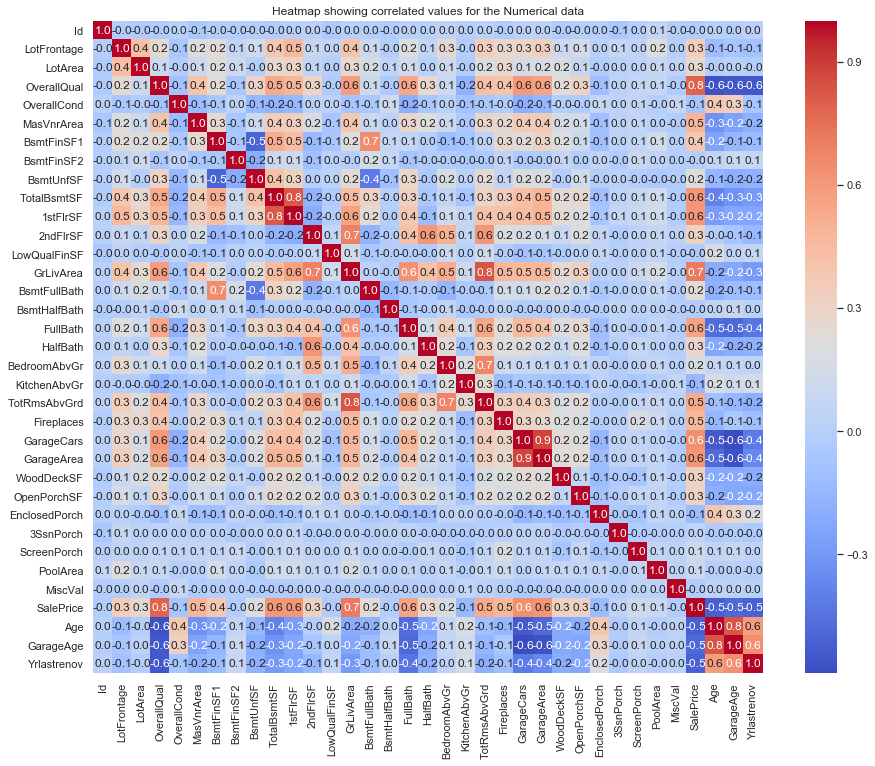

In [161]:
bivariate_num(housing_df)

__Bivariate Analysis__

1. OverallQual has highest correlation with Saleprice. So this mighe be an important variable in our model.
2. TotRmsAbvGrd has high collinearity with GrLivArea. but TotRmsAbvGrd has least correlation with target variable so dropping it.
3. GarageArea and garagecars have are highly correlated. So dropping "GarageArea".
4. Age and GarageAge are highly correlated too. So dropping Garage Age .
     
    
    

In [162]:
#droppping above metioned columns as a result of bivariate analysis
housing_df.drop(['GarageArea','TotRmsAbvGrd','GarageAge'],1,inplace=True)

## Data Cleaning

In [163]:
#lets check the number of rows we have which will have null values more than 50%
len(housing_df[housing_df.isnull().sum(axis=1) > housing_df.shape[1]*0.5])

0

__There are no rows where we have null values more than 50% of the values__

In [164]:
#checking for duplicate rows
#checking if there is any duplicate rows and dropping it
housing_df.drop_duplicates(keep='first',inplace=True)
housing_df.shape

(1460, 57)

__There are no duplicate rows__

In [165]:
#checking null percentage
null=pd.DataFrame(round((housing_df.isnull().sum()/len(housing_df.index))*100,2))
null.columns=['percent']
null.sort_values(by='percent',ascending =False,inplace=True)
null[null['percent']!=0]


,percent
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageFinish,5.55
GarageType,5.55
BsmtExposure,2.60
BsmtQual,2.53


In [166]:
#dropping columns having more than 30% of the values as null
housing_df.drop(list(null[null['percent']>30].index),1,inplace=True)
housing_df.shape

(1460, 52)

In [167]:
#checking null percentage again
null=pd.DataFrame(round((housing_df.isnull().sum()/len(housing_df.index))*100,2))
null.columns=['percent']
null.sort_values(by='percent',ascending =False,inplace=True)
null[null['percent']!=0]

,percent
LotFrontage,17.74
GarageType,5.55
GarageFinish,5.55
BsmtExposure,2.60
BsmtFinType1,2.53
BsmtQual,2.53
MasVnrType,0.55
MasVnrArea,0.55


__Imputing the above variables with the following ways__
1. LotFrontage - mean of the values in the variable
2. GarageType - "No Garage" - as there is no garage for NA
3. GarageFinish - "No Garage" - as there is no garage for NA
4. BsmtExposure - "No Basement" 
5. BsmtFinType1 - "No Basement"
6. MasVnrType - mode
7. MasVnrArea - mean 
8. BsmtQual - "No Basement"

In [168]:
housing_df.loc[housing_df['LotFrontage'].isnull(),'LotFrontage']=housing_df['LotFrontage'].mean()
housing_df.loc[housing_df['GarageType'].isnull(),'GarageType']="No Garage"
housing_df.loc[housing_df['GarageFinish'].isnull(),'GarageFinish']="No Garage"
housing_df.loc[housing_df['BsmtExposure'].isnull(),'BsmtExposure']="No Basement"
housing_df.loc[housing_df['BsmtFinType1'].isnull(),'BsmtFinType1']="No Basement"
housing_df.loc[housing_df['MasVnrType'].isnull(),'MasVnrType']=housing_df['MasVnrType'].mode()[0]
housing_df.loc[housing_df['MasVnrArea'].isnull(),'MasVnrArea']=housing_df['MasVnrArea'].mean()
housing_df.loc[housing_df['BsmtQual'].isnull(),'BsmtQual']="No Basement"

In [169]:
#checking null percentage again
null=pd.DataFrame(round((housing_df.isnull().sum()/len(housing_df.index))*100,2))
null.columns=['percent']
null.sort_values(by='percent',ascending =False,inplace=True)
null[null['percent']!=0]

,percent


__There are no more null values__|

In [170]:
#We can drop the ID column as it is an unique identifier and will not be useful to our final model
housing_df.drop('Id',1,inplace=True)

In [171]:
#Lets check again what is the shape of the dataset
housing_df.shape

(1460, 51)

### Outlier Treatment

In [172]:
num_col=housing_df.select_dtypes(include=['int64','float64']).columns
num_col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age',
       'Yrlastrenov'],
      dtype='object')

As we have identified the below columns having outliers in Univariate analysis. We will treat only these columns

In [173]:
outlier_col=["LotArea","BsmyFInSF2","LowQualFinSF","BsmtHalfBath","KitchenAbvGr","WoodDeckSf","OpenPorchSf","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","BsmyFInSF1"]
def outlier_treatment(df):
    num_col=df.select_dtypes(include=['int64','float64']).columns
    for i in num_col:
        if i in outlier_col:
            Q1=df[i].quantile(0.25)
            Q3=df[i].quantile(0.75)
            IQR=Q3-Q1
            HO=Q3+IQR*1.5
            LO=Q1-IQR*1.5
            df.loc[((df[i]> HO) | (df[i]< LO)),i]=np.nan
            
    return df

In [174]:
housing_df=outlier_treatment(housing_df)

In [175]:
housing_df.shape

(1460, 51)

In [176]:
#checking null percentage
null=pd.DataFrame(round((housing_df.isnull().sum()/len(housing_df.index))*100,2))
null.columns=['percent']
null.sort_values(by='percent',ascending =False,inplace=True)
null[null['percent']!=0]


,percent
EnclosedPorch,14.25
ScreenPorch,7.95
BsmtHalfBath,5.62
LotArea,4.73
KitchenAbvGr,4.66
MiscVal,3.56
LowQualFinSF,1.78
3SsnPorch,1.64
PoolArea,0.48


In [177]:
housing_df.dropna(axis=0,inplace=True)
housing_df.shape

(923, 51)

## Data Preperation

- MSSubClass  has high cardinality so merging below categorical levels together ,combining all the one story 's , 2 story's and others 
    - 20,30,40,120 as 1-Story
    - 45,50, 150 as 1.5-Story
    - 60,70,160,90 as 2 story 
    - 75,80,85,180,190 as others
    
- In MSZoning we can combine FV,RH and C as others.
- In LotConfig we can combine FR2 and FR3
- In Neighbourhood we can divide on high_class, mid_class and low_class neighbourhood based on the mean sale price per neihbourhood
    - __High class__ -NridgHt,NoRidge,StoneBr
    - __Medium_class__ - CollgCr, Somerst, Gilbert, NWAmes, SawyerW, Crawfor, Mitchel, Timber,     ClearCr, Blmngtn,Veenker
    - __Low Class__ - NAmes, OldTown, Edwards, Sawyer, BrkSide, IDOTRR, SWISU, MeadowV, BrDale, NPkVill, Blueste
- RoofStyle- has similar categorical data as MSSubclass so will drop this variable.
- In Exterior1st combining  Plywood, CemntBd, BrkFace, WdShing, Stucco, AsbShng, BrkComm, Stone, AsphShn, CBlock, ImStucc as others.
- Exterior2nd has similar distribution as 1st so dropping it 
- In ExterQual we can do label encoding , with the below values
    - Excellent - 5
    - Good - 4
    - Average/typical - 3
    - Fair - 2
    - Poor - 1
- In Foundation we can combine Slab,Stone and wood as others 
- In BsmtQual we can do label encoding , with the below values
    - Excellent - 5
    - Good - 4
    - Average/typical - 3
    - Fair - 2
    - Poor - 1
- In BsmtExposure we can do label encoding , with the below values
    - Good Exposure - 4
    - Average Exposure  - 3
    - Mimimum Exposure - 2
    - No Exposure - 1
    - No Basement - 0
- In BsmtFinType1 we can do label encoding , with the below values
    - GLQ - 6
    - ALQ - 5 
    - BLQ -4	
    - Rec -3
    - LwQ -2 
    - Unf -1 
    - NA - 0
- In HeatingQC, similarly Label encoding can be used with below values
    - Ex - 5
    - Gd -4
    - TA - 3
    - Fa - 2
    - Po - 1
- In KitchenQual, similarly Label encoding can be used with below values
    - Ex - 5
    - Gd -4
    - TA - 3
    - Fa - 2
    - Po - 1 
- We can divide the GarageType into two levels "inhouse" and "outhouse"
    - Attchd, Basment, BuiltIn can be tagged as inhouse 
    - Detchd, CarPort and 2Types can be tagged as outhouse



In [178]:
#repacing the values of "MSSubClass" as mentioned above
housing_df.loc[housing_df['MSSubClass']== 20,'MSSubClass'] = "1Story"
housing_df.loc[housing_df['MSSubClass']== 30,'MSSubClass'] = "1Story"
housing_df.loc[housing_df['MSSubClass']== 40,'MSSubClass'] = "1Story"
housing_df.loc[housing_df['MSSubClass']== 120,'MSSubClass'] = "1Story"

housing_df.loc[housing_df['MSSubClass']== 45,'MSSubClass'] = "1.5Story"
housing_df.loc[housing_df['MSSubClass']== 50,'MSSubClass'] = "1.5Story"
housing_df.loc[housing_df['MSSubClass']== 150,'MSSubClass'] = "1.5Story"



housing_df.loc[housing_df['MSSubClass']== 60,'MSSubClass'] = "2Story"
housing_df.loc[housing_df['MSSubClass']== 70,'MSSubClass'] = "2Story"
housing_df.loc[housing_df['MSSubClass']== 160,'MSSubClass'] = "2Story"
housing_df.loc[housing_df['MSSubClass']== 90,'MSSubClass'] = "2Story"

housing_df.loc[housing_df['MSSubClass']== 75,'MSSubClass'] = "others"
housing_df.loc[housing_df['MSSubClass']== 80,'MSSubClass'] = "others"
housing_df.loc[housing_df['MSSubClass']== 85,'MSSubClass'] = "others"
housing_df.loc[housing_df['MSSubClass']== 180,'MSSubClass'] = "others"
housing_df.loc[housing_df['MSSubClass']== 190,'MSSubClass'] = "others"

In [179]:
#repacing the values of "MSzoning" as mentioned above
housing_df.loc[housing_df['MSZoning']== 'FV','MSZoning']='others'
housing_df.loc[housing_df['MSZoning']== 'RH','MSZoning']='others'
housing_df.loc[housing_df['MSZoning']== 'C (all)','MSZoning']='others'

In [180]:
#repacing the values of "LotConfig" as mentioned above
housing_df.loc[housing_df['LotConfig']== 'FR3','LotConfig']='FR2'


In [181]:
#repacing the values of "Neighborhood" as mentioned above
housing_df.loc[housing_df['Neighborhood']== 'NridgHt','Neighborhood']='High_class'
housing_df.loc[housing_df['Neighborhood']== 'NoRidge','Neighborhood']='High_class'
housing_df.loc[housing_df['Neighborhood']== 'StoneBr','Neighborhood']='High_class'

housing_df.loc[housing_df['Neighborhood']== 'CollgCr','Neighborhood']='Medium_class'
housing_df.loc[housing_df['Neighborhood']== 'Somerst','Neighborhood']='Medium_class'
housing_df.loc[housing_df['Neighborhood']== 'Gilbert','Neighborhood']='Medium_class'
housing_df.loc[housing_df['Neighborhood']== 'NWAmes','Neighborhood']='Medium_class'
housing_df.loc[housing_df['Neighborhood']== 'SawyerW','Neighborhood']='Medium_class'
housing_df.loc[housing_df['Neighborhood']== 'Crawfor','Neighborhood']='Medium_class'
housing_df.loc[housing_df['Neighborhood']== 'Mitchel','Neighborhood']='Medium_class'
housing_df.loc[housing_df['Neighborhood']== 'Timber','Neighborhood']='Medium_class'
housing_df.loc[housing_df['Neighborhood']== 'ClearCr','Neighborhood']='Medium_class'
housing_df.loc[housing_df['Neighborhood']== 'Blmngtn','Neighborhood']='Medium_class'
housing_df.loc[housing_df['Neighborhood']== 'Veenker','Neighborhood']='Medium_class'

housing_df.loc[housing_df['Neighborhood']== 'NAmes','Neighborhood']='Low_class'
housing_df.loc[housing_df['Neighborhood']== 'OldTown','Neighborhood']='Low_class'
housing_df.loc[housing_df['Neighborhood']== 'Edwards','Neighborhood']='Low_class'
housing_df.loc[housing_df['Neighborhood']== 'Sawyer','Neighborhood']='Low_class'
housing_df.loc[housing_df['Neighborhood']== 'BrkSide','Neighborhood']='Low_class'
housing_df.loc[housing_df['Neighborhood']== 'IDOTRR','Neighborhood']='Low_class'
housing_df.loc[housing_df['Neighborhood']== 'SWISU','Neighborhood']='Low_class'
housing_df.loc[housing_df['Neighborhood']== 'MeadowV','Neighborhood']='Low_class'
housing_df.loc[housing_df['Neighborhood']== 'BrDale','Neighborhood']='Low_class'
housing_df.loc[housing_df['Neighborhood']== 'NPkVill','Neighborhood']='Low_class'
housing_df.loc[housing_df['Neighborhood']== 'Blueste','Neighborhood']='Low_class'

In [182]:
#repacing the values of "Exterior1st" as mentioned above
housing_df.loc[housing_df['Exterior1st']== 'plywood','Exterior1st']='others'
housing_df.loc[housing_df['Exterior1st']== 'CemntBd','Exterior1st']='others'
housing_df.loc[housing_df['Exterior1st']== 'BrkFace','Exterior1st']='others'
housing_df.loc[housing_df['Exterior1st']== 'WdShing','Exterior1st']='others'
housing_df.loc[housing_df['Exterior1st']== 'Stucco','Exterior1st']='others'
housing_df.loc[housing_df['Exterior1st']== 'AsbShng','Exterior1st']='others'
housing_df.loc[housing_df['Exterior1st']== 'BrkComm','Exterior1st']='others'
housing_df.loc[housing_df['Exterior1st']== 'Stone','Exterior1st']='others'
housing_df.loc[housing_df['Exterior1st']== 'AsphShn','Exterior1st']='others'
housing_df.loc[housing_df['Exterior1st']== 'CBlock','Exterior1st']='others'
housing_df.loc[housing_df['Exterior1st']== 'ImStucc','Exterior1st']='others'

In [183]:
#repacing the values of "ExterQual" as mentioned above
housing_df.loc[housing_df['ExterQual']== 'Ex','ExterQual']=5
housing_df.loc[housing_df['ExterQual']== 'Gd','ExterQual']=4
housing_df.loc[housing_df['ExterQual']== 'TA','ExterQual']=3
housing_df.loc[housing_df['ExterQual']== 'Fa','ExterQual']=2


In [184]:
#repacing the values of "Foundation" as mentioned above

housing_df.loc[housing_df['Foundation']== 'Slab','Foundation']='others'
housing_df.loc[housing_df['Foundation']== 'Stone','Foundation']='others'
housing_df.loc[housing_df['Foundation']== 'Wood','Foundation']='others'

In [185]:
#repacing the values of "BsmtQual" as mentioned above
housing_df.loc[housing_df['BsmtQual']== 'Ex','BsmtQual']=5
housing_df.loc[housing_df['BsmtQual']== 'Gd','BsmtQual']=4
housing_df.loc[housing_df['BsmtQual']== 'TA','BsmtQual']=3
housing_df.loc[housing_df['BsmtQual']== 'Fa','BsmtQual']=2
housing_df.loc[housing_df['BsmtQual']== 'No Basement','BsmtQual']=0

In [186]:
#replacing the values of "BsmtExposure" as mentioned above
housing_df.loc[housing_df['BsmtExposure']== 'Gd','BsmtExposure']=4
housing_df.loc[housing_df['BsmtExposure']== 'Av','BsmtExposure']=3
housing_df.loc[housing_df['BsmtExposure']== 'Mn','BsmtExposure']=2
housing_df.loc[housing_df['BsmtExposure']== 'No','BsmtExposure']=1
housing_df.loc[housing_df['BsmtExposure']== 'No Basement','BsmtExposure']=0

In [187]:
#replacing the values of "BsmtFinType1" as mentioned above
housing_df.loc[housing_df['BsmtFinType1']== 'GLQ','BsmtFinType1']=6
housing_df.loc[housing_df['BsmtFinType1']== 'ALQ','BsmtFinType1']=5
housing_df.loc[housing_df['BsmtFinType1']== 'BLQ','BsmtFinType1']=4
housing_df.loc[housing_df['BsmtFinType1']== 'Rec','BsmtFinType1']=3
housing_df.loc[housing_df['BsmtFinType1']== 'LwQ','BsmtFinType1']=2
housing_df.loc[housing_df['BsmtFinType1']== 'Unf','BsmtFinType1']=1
housing_df.loc[housing_df['BsmtFinType1']== 'No Basement','BsmtFinType1']=0

In [188]:
#repacing the values of "HeatingQC" as mentioned above
housing_df.loc[housing_df['HeatingQC']== 'Ex','HeatingQC']=5
housing_df.loc[housing_df['HeatingQC']== 'Gd','HeatingQC']=4
housing_df.loc[housing_df['HeatingQC']== 'TA','HeatingQC']=3
housing_df.loc[housing_df['HeatingQC']== 'Fa','HeatingQC']=2




In [189]:

#repacing the values of "KitchenQual" as mentioned above
housing_df.loc[housing_df['KitchenQual']== 'Ex','KitchenQual']=5
housing_df.loc[housing_df['KitchenQual']== 'Gd','KitchenQual']=4
housing_df.loc[housing_df['KitchenQual']== 'TA','KitchenQual']=3
housing_df.loc[housing_df['KitchenQual']== 'Fa','KitchenQual']=2



In [190]:
#repacing the values of "GarageType" as mentioned above

housing_df.loc[housing_df['GarageType']== 'Attchd','GarageType']='inhouse'
housing_df.loc[housing_df['GarageType']== 'Basment','GarageType']='inhouse'
housing_df.loc[housing_df['GarageType']== 'BuiltIn','GarageType']='inhouse'
housing_df.loc[housing_df['GarageType']== 'Detchd','GarageType']='outhouse'
housing_df.loc[housing_df['GarageType']== 'CarPort','GarageType']='outhouse'
housing_df.loc[housing_df['GarageType']== '2Types','GarageType']='outhouse'
#dropping 
housing_df=housing_df[housing_df['GarageType']!='No Garage']

In [191]:
housing_df.shape

(882, 51)

In [192]:
#dropping RoofStyle and Exterior2nd as mentioned above
housing_df.drop(['RoofStyle','Exterior2nd'],1,inplace=True)

In [193]:
housing_df.shape

(882, 49)

In [194]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 1459
Data columns (total 49 columns):
MSSubClass       882 non-null object
MSZoning         882 non-null object
LotFrontage      882 non-null float64
LotArea          882 non-null float64
LotShape         882 non-null object
LotConfig        882 non-null object
Neighborhood     882 non-null object
HouseStyle       882 non-null object
OverallQual      882 non-null int64
OverallCond      882 non-null int64
Exterior1st      882 non-null object
MasVnrType       882 non-null object
MasVnrArea       882 non-null float64
ExterQual        882 non-null int64
Foundation       882 non-null object
BsmtQual         882 non-null int64
BsmtExposure     882 non-null int64
BsmtFinType1     882 non-null int64
BsmtFinSF1       882 non-null int64
BsmtFinSF2       882 non-null int64
BsmtUnfSF        882 non-null int64
TotalBsmtSF      882 non-null int64
HeatingQC        882 non-null int64
1stFlrSF         882 non-null int64
2ndFlrSF       

### Creating Dummies

In [195]:
# creating dummy variables for categorical variables

housing_categorical = housing_df.select_dtypes(include=['object'])
housing_categorical.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,Exterior1st,MasVnrType,Foundation,GarageType,GarageFinish,QuarSold
0,2Story,RL,Reg,Inside,Medium_class,2Story,VinylSd,BrkFace,PConc,inhouse,RFn,Q1
2,2Story,RL,IR1,Inside,Medium_class,2Story,VinylSd,BrkFace,PConc,inhouse,RFn,Q3
4,2Story,RL,IR1,FR2,High_class,2Story,VinylSd,BrkFace,PConc,inhouse,RFn,Q4
6,1Story,RL,Reg,Inside,Medium_class,1Story,VinylSd,Stone,PConc,inhouse,RFn,Q3
10,1Story,RL,Reg,Inside,Low_class,1Story,HdBoard,None,CBlock,outhouse,Unf,Q1


In [196]:
# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSSubClass_1Story,MSSubClass_2Story,MSSubClass_others,MSZoning_RM,MSZoning_others,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,...,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_others,GarageType_outhouse,GarageFinish_RFn,GarageFinish_Unf,QuarSold_Q2,QuarSold_Q3,QuarSold_Q4
0,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
6,1,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
10,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0


In [197]:
housing_dummies.columns

Index(['MSSubClass_1Story', 'MSSubClass_2Story', 'MSSubClass_others',
       'MSZoning_RM', 'MSZoning_others', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_Inside', 'Neighborhood_Low_class',
       'Neighborhood_Medium_class', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_others',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_others',
       'GarageType_outhouse', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'QuarSold_Q2', 'QuarSold_Q3', 'QuarSold_Q4'],
      dtype='object')

In [198]:
#dropping the categorical columns for which dummies have been created
housing_df = housing_df.drop(list(housing_categorical.columns), axis=1)

#concatenating the dummy df and our data df
housing_df= pd.concat([housing_df, housing_dummies], axis=1)

In [199]:
housing_dummies.shape

(882, 36)

In [200]:
housing_df.shape

(882, 73)

### Train-Test-split

In [201]:
from sklearn.model_selection import train_test_split
y=housing_df['SalePrice']
X=housing_df.drop('SalePrice',axis=1)

In [202]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [203]:
X_train.shape

(617, 72)

In [204]:
X_test.shape

(265, 72)

### Scaling

In [205]:
from sklearn.preprocessing import StandardScaler
num=X_train.select_dtypes(include=['int64','float64']).columns
scaler=StandardScaler()
X_train[num]=scaler.fit_transform(X_train[num])

### Ordinary Least Square

In [206]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [207]:
X_train_rfe=X_train.copy()

In [208]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train_rfe, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 27),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 46),
 ('ExterQual', False, 52),
 ('BsmtQual', False, 25),
 ('BsmtExposure', False, 16),
 ('BsmtFinType1', False, 47),
 ('BsmtFinSF1', False, 5),
 ('BsmtFinSF2', False, 35),
 ('BsmtUnfSF', False, 36),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 51),
 ('1stFlrSF', False, 13),
 ('2ndFlrSF', False, 14),
 ('LowQualFinSF', False, 37),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 58),
 ('BsmtHalfBath', False, 39),
 ('FullBath', False, 55),
 ('HalfBath', False, 34),
 ('BedroomAbvGr', False, 17),
 ('KitchenAbvGr', False, 38),
 ('KitchenQual', False, 24),
 ('Fireplaces', False, 29),
 ('GarageCars', False, 2),
 ('WoodDeckSF', False, 48),
 ('OpenPorchSF', False, 31),
 ('EnclosedPorch', False, 57),
 ('3SsnPorch', False, 45),
 ('ScreenPorch', False, 43),
 ('PoolArea', False, 44),
 ('MiscVal', False, 40),
 ('Age', True, 1),
 ('Yrlastrenov', False, 54),
 ('MSSubCla

In [209]:
#We will use statsmodel to validate our models
import statsmodels.api as sm
def modelling(df):
    df = sm.add_constant(df)
    lm = sm.OLS(y_train,df).fit()
    print(lm.summary())
    return lm
    

In [210]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [211]:
#checking the model created above with all the variables using statsmodel
modelling(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     91.67
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          1.21e-251
Time:                        20:51:26   Log-Likelihood:                -7040.8
No. Observations:                 617   AIC:                         1.421e+04
Df Residuals:                     554   BIC:                         1.449e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [212]:
#considering only the 15 selected by RFE
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,GrLivArea,Age,MSZoning_others,LotConfig_FR2,Neighborhood_Low_class,Neighborhood_Medium_class,Exterior1st_MetalSd,Exterior1st_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
143,0.329696,0.494496,-0.482183,1.034919,0.009553,-0.638104,0,0,0,1,0,0,1,0,0
1304,-1.802334,0.494496,-0.482183,-0.287392,0.447342,-0.960355,0,0,1,0,0,0,0,0,1
268,-0.720724,-0.983004,0.587985,-0.894523,-1.519534,1.698216,0,0,1,0,0,0,0,1,0
1215,-0.661399,-0.983004,-0.482183,-0.498344,-1.274203,0.610619,0,0,1,0,0,0,0,1,0
1191,-2.021898,1.233246,-0.482183,-0.801910,-0.117342,-0.718667,1,0,0,1,1,0,1,0,0


In [213]:
#Function to delete a column/variable
def drop(col):
    X_train_rfe.drop(col,axis=1,inplace=True)

In [214]:
checkVIF(X_train_rfe)

,Features,VIF
8,Neighborhood_Low_class,8.03
13,MasVnrType_None,7.45
9,Neighborhood_Medium_class,6.83
12,MasVnrType_BrkFace,5.05
1,OverallQual,3.51
5,Age,3.17
14,MasVnrType_Stone,2.29
4,GrLivArea,2.25
3,TotalBsmtSF,1.70
0,LotArea,1.46


In [215]:
#1st model 
lm1=modelling(X_train_rfe)
checkVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     286.6
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          4.50e-262
Time:                        20:51:26   Log-Likelihood:                -7140.4
No. Observations:                 617   AIC:                         1.431e+04
Df Residuals:                     601   BIC:                         1.438e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
8,Neighborhood_Low_class,8.03
13,MasVnrType_None,7.45
9,Neighborhood_Medium_class,6.83
12,MasVnrType_BrkFace,5.05
1,OverallQual,3.51
5,Age,3.17
14,MasVnrType_Stone,2.29
4,GrLivArea,2.25
3,TotalBsmtSF,1.70
0,LotArea,1.46


In [216]:
#dropping MasVnrType_BrkFace  as it is having high P value 
drop('MasVnrType_BrkFace')

In [217]:
#2nd model
lm2=modelling(X_train_rfe)
checkVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     306.6
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          5.80e-263
Time:                        20:51:27   Log-Likelihood:                -7141.2
No. Observations:                 617   AIC:                         1.431e+04
Df Residuals:                     602   BIC:                         1.438e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
1,OverallQual,3.39
5,Age,3.04
8,Neighborhood_Low_class,2.78
12,MasVnrType_None,2.70
4,GrLivArea,2.18
9,Neighborhood_Medium_class,2.17
3,TotalBsmtSF,1.68
0,LotArea,1.46
13,MasVnrType_Stone,1.41
6,MSZoning_others,1.37


In [218]:
#dropping MasVnrType_None as it having high p value
drop('MasVnrType_None')

In [219]:
#3rd Model
lm3=modelling(X_train_rfe)
checkVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     330.2
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          4.75e-264
Time:                        20:51:27   Log-Likelihood:                -7141.7
No. Observations:                 617   AIC:                         1.431e+04
Df Residuals:                     603   BIC:                         1.437e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
1,OverallQual,3.38
5,Age,3.03
8,Neighborhood_Low_class,2.20
4,GrLivArea,2.18
3,TotalBsmtSF,1.66
9,Neighborhood_Medium_class,1.46
0,LotArea,1.44
6,MSZoning_others,1.36
12,MasVnrType_Stone,1.36
10,Exterior1st_MetalSd,1.35


In [220]:
#dropping LotConfig_FR2 as it is having very high P values
drop('LotConfig_FR2')

In [221]:
#4th model
lm4=modelling(X_train_rfe)
checkVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     356.1
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          1.22e-264
Time:                        20:51:27   Log-Likelihood:                -7143.3
No. Observations:                 617   AIC:                         1.431e+04
Df Residuals:                     604   BIC:                         1.437e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
1,OverallQual,3.38
5,Age,3.03
7,Neighborhood_Low_class,2.19
4,GrLivArea,2.18
3,TotalBsmtSF,1.66
0,LotArea,1.44
8,Neighborhood_Medium_class,1.43
6,MSZoning_others,1.36
11,MasVnrType_Stone,1.36
9,Exterior1st_MetalSd,1.35


__The model above looks good to me , We cam try scaling the test data cand see the result__

### Residuals

In [222]:
X_train_rfe=sm.add_constant(X_train_rfe)
y_train_pred_rfe=lm4.predict(X_train_rfe)

In [223]:
res= y_train - y_train_pred_rfe

In [224]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [225]:
#rmse of our model 
np.sqrt(mean_squared_error(y_train, y_train_pred_rfe))

25810.174023480537

Text(0.5, 0, 'Errors')

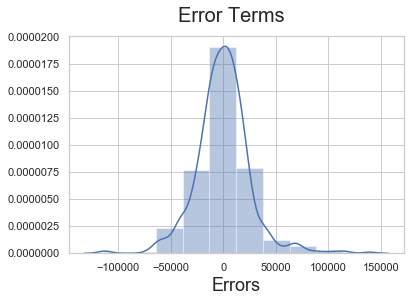

In [226]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res,bins=10)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

__The residual plot looks good so we can predict our test data__

### OLS Model Evaluation

In [227]:
#scaling our test data 
num_var=X_test.select_dtypes(include=['int64','float64']).columns
X_test[num_var]= scaler.transform(X_test[num_var])


In [228]:
#creatiung a copy to be used by ols
X_test_rfe=X_test.copy()

In [229]:
X_train_rfe.drop('const',1,inplace=True)

In [230]:
#dropping columns not in model

X_test_rfe=X_test[X_train_rfe.columns]
X_test_rfe=sm.add_constant(X_test_rfe)

In [231]:
y_test_pred_rfe=lm4.predict(X_test_rfe)

In [232]:
#THIs is r2 for Test
r2_score(y_test,y_test_pred_rfe)

0.8504736005352449

In [233]:
#This is  r2 for train
r2_score(y_train,y_train_pred_rfe)

0.8761732801756973

__There is a 3% difference in the R2 between the known and the unknown data__

__The important variables in our OLS model are__
- GrLivArea
- OverallQual
- TotalBsmtSF
- Exterior1st_others
- LotArea

### Model Building and Evaluation

### Ridge

In [234]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge=Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    1.2s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [235]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200] #for better readability 
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004688,0.005817,0.002693,0.005125,0.0001,{'alpha': 0.0001},0.859987,0.914782,0.908344,0.886032,...,0.909444,0.912323,0.914396,0.909939,0.910527,0.910404,0.922659,0.913044,0.912398,0.003788
1,0.002992,0.002275,0.000898,0.000537,0.001,{'alpha': 0.001},0.859988,0.914784,0.908350,0.886037,...,0.909444,0.912323,0.914396,0.909939,0.910527,0.910404,0.922659,0.913044,0.912398,0.003788
2,0.002194,0.001396,0.001297,0.001342,0.01,{'alpha': 0.01},0.859995,0.914807,0.908413,0.886081,...,0.909444,0.912322,0.914396,0.909938,0.910526,0.910404,0.922659,0.913044,0.912397,0.003788
3,0.005386,0.007702,0.000598,0.000489,0.05,{'alpha': 0.05},0.860031,0.914893,0.908681,0.886210,...,0.909443,0.912313,0.914392,0.909927,0.910517,0.910396,0.922657,0.913039,0.912391,0.003790
4,0.002394,0.001353,0.000898,0.000299,0.1,{'alpha': 0.1},0.860079,0.914984,0.908994,0.886297,...,0.909439,0.912301,0.914385,0.909911,0.910505,0.910384,0.922653,0.913032,0.912382,0.003792


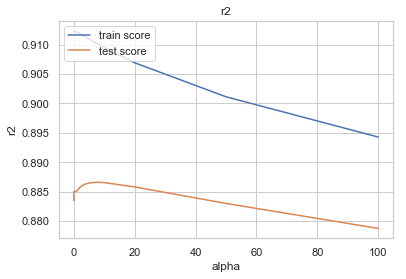

In [236]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

__The closest the test and train score were ever were at 10 . beyond both the "r2" scores for both train and test are declining parallely__

In [237]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([  2942.60394848,   7724.13658767,  12354.32315553,   6656.54301591,
         2187.77163076,   2308.54104979,   2761.57030783,   4755.80132253,
         1629.43430949,   5504.62095724,   1681.96523286,   -287.86033217,
         6321.77584508,   -556.88571339,   9931.76825469,  10323.80528024,
            0.        ,  16972.95887478,   -251.82394757,      0.        ,
         -207.54411584,   1891.51590034,  -4874.89111955,      0.        ,
         5408.69377626,   2208.90508512,   6803.91348688,   1080.87897148,
         2549.67900154,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,  -7314.70972107,    960.52488588,
         3351.68015203,  -1361.77488338,  -2802.88188215,  -6049.06042998,
         8438.27371397,  -4160.16534688,  -2931.36847371,   -578.41767392,
         6581.66769785,  -6725.29585574,   1858.82494333, -15303.50411675,
       -20863.47816555,   -251.86462129,   1524.48149628,    343.5436278 ,
          880.9870299 ,  

In [238]:
y_train_pred_ridge=ridge.predict(X_train)

In [239]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2_score(y_train,y_train_pred_ridge)

0.9087092620462502

In [240]:
mean_squared_error(y_train_pred_ridge,y_train)

491127457.17200655

In [241]:
#cocncatenating the feaatures with its  coefficients
ridge_features=dict(zip(ridge.coef_,X.columns))
ridge_features=pd.DataFrame(list(ridge_features.items()),columns={'features','coeff'})
ridge_features.sort_values(by='coeff',ascending=False).head()

,coeff,features
17,16972.958875,GrLivArea
2,12354.323156,OverallQual
15,10323.805280,2ndFlrSF
52,10221.207196,Exterior1st_others
14,9931.768255,1stFlrSF


In [242]:
#Test data set is already scalled
X_test_ridge=X_test.copy()

In [243]:
y_test_pred_ridge=ridge.predict(X_test_ridge)
r2_score(y_test,y_test_pred_ridge)

0.8897898111806803

__The r2 scores in ridge are__
- Train R2 - 0.908
- Test R2 - 0.889

__The is just 2% difference in R2 scores between known and unknown data when modelled by ridge__

### Lasso

In [244]:
from sklearn.linear_model import Lasso

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


lasso=Lasso()

# cross validation
folds = 10
model_cv_lasso = GridSearchCV(lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_lasso.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    6.2s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [245]:
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
#cv_results_lasso = cv_results_lasso[cv_results_lasso['param_alpha']<=200]
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.024933,0.007108,0.000698,0.000457,0.0001,{'alpha': 0.0001},0.859985,0.914796,0.908483,0.886058,...,0.909444,0.912323,0.914396,0.909939,0.910526,0.910404,0.922659,0.913044,0.912398,0.003788
1,0.021841,0.002160,0.000598,0.000489,0.001,{'alpha': 0.001},0.859985,0.914796,0.908483,0.886058,...,0.909444,0.912323,0.914396,0.909939,0.910526,0.910404,0.922659,0.913044,0.912398,0.003788
2,0.021642,0.001842,0.000499,0.000499,0.01,{'alpha': 0.01},0.859985,0.914797,0.908484,0.886060,...,0.909444,0.912323,0.914396,0.909939,0.910526,0.910404,0.922659,0.913044,0.912398,0.003788
3,0.023237,0.001947,0.000599,0.000489,0.05,{'alpha': 0.05},0.859986,0.914800,0.908486,0.886068,...,0.909444,0.912323,0.914396,0.909939,0.910526,0.910404,0.922659,0.913044,0.912398,0.003788
4,0.024733,0.002309,0.001297,0.001342,0.1,{'alpha': 0.1},0.859987,0.914805,0.908488,0.886078,...,0.909444,0.912322,0.914396,0.909939,0.910526,0.910404,0.922659,0.913044,0.912397,0.003788


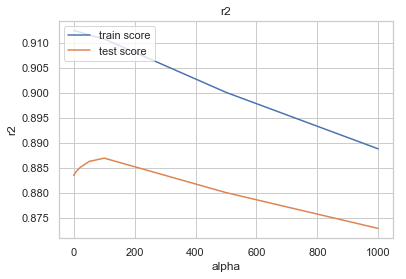

In [246]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

__choosing the value of lamba as 150 because after that the train and test are decreasing paralelly__

In [247]:
alpha = 150
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([  2398.11681906,   7851.85972957,  12661.23814279,   6394.1388501 ,
         1094.47994341,   1762.68912062,   2049.15799202,   4665.29609681,
         1467.66166659,   5514.5254696 ,   1347.71022252,     -0.        ,
         6599.19483751,   -134.26907553,    928.96557668,      0.        ,
            0.        ,  28701.53418728,     -0.        ,      0.        ,
         -363.00245688,   1409.45059904,  -4790.33643151,      0.        ,
         5027.29231609,   1863.35756282,   6648.07592905,    823.70318847,
         2438.89859467,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,  -7166.06559762,    346.35054344,
         4537.90565186,     -0.        ,     -0.        ,  -5116.31518201,
         9252.62518484,     -0.        ,     -0.        ,     -0.        ,
         4129.65142276,  -6670.50106263,    733.89832236, -23347.78839385,
       -26597.61216217,     -0.        ,      0.        ,      0.        ,
           -0.        ,  

In [248]:
y_train_pred_lasso=lasso.predict(X_train)

In [249]:
r2_score(y_train,y_train_pred_lasso)

0.9086449625835127

In [250]:
mean_squared_error(y_train_pred_lasso,y_train)

491473376.5099335

In [251]:
#cocncatenating the feaatures with its  coefficients
lasso_features=dict(zip(lasso.coef_,X.columns))
lasso_features=pd.DataFrame(list(lasso_features.items()),columns={'features','coeff'})
lasso_features.sort_values(by='coeff',ascending=False).head()

,coeff,features
15,28701.534187,GrLivArea
2,12661.238143,OverallQual
38,11093.743196,Exterior1st_others
28,9252.625185,MSZoning_others
1,7851.859730,LotArea


In [252]:
X_test_lasso=X_test.copy()

In [253]:
y_test_pred_lasso=lasso.predict(X_test_lasso)
r2_score(y_test,y_test_pred_lasso)

0.8893086076709784

__The r2 scores in Lasso are__
- Train R2 - 0.91
- Test R2 - 0.889

__The is also just 2% difference in R2 scores between known and unknown data when modelled by Lasso__

In [254]:
#Number of features in Lasso
len(lasso_features.index)

45

In [255]:
#Number of features in ridge
len(ridge_features.index)

65

__Ridge Regression Metrics__
- __Train r2__ -0.91
- __Test r2__ - 0.89


__Lasso Regression Metrics__
- __Train r2__ - 0.91
- __Test r2__ - 0.89

__Important Factors for the price prediction as per Lasso and ridge are__
1. GrLivArea
2. OverallQual
3. Exterior1st_others


- __The regularized regression(both Lasso and ridge) has a 2% error in prediction on test data as compared to 3% in OLS method.__
- __Hence i would use regularizes model as compared to OLS for better accuracy.__
- Among Lasso and ridge i would choose __Lasso__ as my final model even when  the accuracy of both models are same because 
    - Lasso has less features as compared to ridge.
    - As there are less variables, it is much simpler model, Hence higher is the stability and genralization.
